![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Deep Learning Methods </center>
## <center> Exercise 1 - Regression </center>
### <center> From scratch </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/DeepLearningMethods/Exercises/Exercise01_Regression.ipynb)

In [39]:
#-- Wide screen:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [40]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})
np.random.seed(1)

In [1]:
if 'google.colab' in str(get_ipython()):
    !npx degit FixelAlgorithmsTeam/FixelCourses/DeepLearningMethods/Exercises/DeepLearningFramework ./DeepLearningFramework

### Exercise
#### Regression model:
* Adapt the library `DeepLearningFramework` to support regression models:
    * Implement the `MSE` loss (both value and gradient) in the `Metric` module.
    * Implement the `R2` function in the `Metric` module.  
    (You may use `sklearn` for that)
    * Review the `DeepLearningFramework.Training.Epoch` function.  
    Make sure you understand the function signature.
* Implement (fill the missing) `TrainRegressionModel` function.  
You can use `DeepLearningFramework.Training.TrainClassificationModel` as a reference.
    
#### Regression task:
* Use the California housing dataset `fetch_california_housing`.
* Try to get the best MSE\R2 score you can ($R^2$ above 0.8 is good).  

**Tips:**
* Try different:
    * Models (layers\activations)
    * Hyper-parameters
    * Optimizers
    * Regularizations

In [ ]:
import _pickle as pickle
import time

from DeepLearningFramework.Training import Epoch
from DeepLearningFramework.Metric   import ???, ???

def TrainRegressionModel(oModel, oTrainData, oValData, nEpochs, oOptim):

    Loss   = ???
    Metric = ???

    vTrainLoss = np.full(nEpochs, np.nan)
    vTrainR2   = np.full(nEpochs, np.nan)
    vValLoss   = np.full(nEpochs, np.nan)
    vValR2     = np.full(nEpochs, np.nan)
    bestR2     = 0

    for epoch in range(nEpochs):
        startTime = time.time()
        oModel.train       = True
        trainLoss, trainR2 = Epoch(oModel, oTrainData, Loss, Metric, oOptim, bTrain=True )
        oModel.train       = False
        valLoss,   valR2   = Epoch(oModel, oValData,   Loss, Metric,         bTrain=False)
        epochTime = time.time() - startTime

        #-- Display:
        print('Epoch '          f'{epoch    :03d}:',   end='')
        print(' | Train loss: ' f'{trainLoss:.5f}' ,   end='')
        print(' | Val loss: '   f'{valLoss  :.5f}' ,   end='')
        print(' | Train R2: '   f'{trainR2 :+2.4f}',   end='')
        print(' | Val R2: '     f'{valR2   :+2.4f}',   end='')
        print(' | epoch time: ' f'{epochTime:3.3f} |', end='')

        vTrainLoss[epoch] = trainLoss
        vTrainR2  [epoch] = trainR2
        vValLoss  [epoch] = valLoss
        vValR2    [epoch] = valR2

        #-- Save best model (early stopping):
        if ???
            bestR2 = ???
            print(' <-- Checkpoint!', end='')
            try:
                with open('BestModel.pkl', 'wb') as oFile:
                    pickle.dump(oModel, oFile)
            except:
                pass
        print('')

    #-- Load best model (early stopping):
    with open('BestModel.pkl', 'rb') as oFile:
        oModel = pickle.load(oFile)

    return oModel, (vTrainLoss, vTrainR2, vValLoss, vValR2)


#### Load data:

In [15]:
from sklearn.datasets import fetch_california_housing

mX, vY  = fetch_california_housing(return_X_y=True)
mX     -= np.mean(mX, axis=0)
mX     /= np.std (mX, axis=0)

mX.shape, vY.shape

((20640, 8), (20640,))

#### Split to train and validation:

In [30]:
from sklearn.model_selection import train_test_split

nTrain = 15000
nTest  = 5640

mTrainX, mTestX, vTrainY, vTestY = train_test_split(mX, vY, train_size=nTrain, test_size=nTest)

(
mTrainX.shape, 
vTrainY.shape, 
mTestX.shape,  
vTestY.shape
)

((15000, 8), (15000,), (5640, 8), (5640,))

#### Load relevant modules:

In [31]:
from DeepLearningFramework.Layers    import ???
from DeepLearningFramework.Models    import ???
from DeepLearningFramework.Dataset   import ???
from DeepLearningFramework.Optimizer import ???

#### Train and validation datasets:

In [32]:
batchSize = ???
oTrainSet = Dataset(mTrainX.T, vTrainY, batchSize)
oValSet   = Dataset(mValX.T,   vValY,   2*batchSize)

#### Model:

In [33]:
def GetModel():
    oModel = SequentialModel([
        ???
    ])
    
    return oModel

#### Train the model:

In [41]:
np.random.seed(1)

oModel    = GetModel()
oOptim    = ???
nEpochs   = ???

oModel, lHistory = TrainRegressionModel(oModel, oTrainSet, oValSet, nEpochs, oOptim)

SyntaxError: invalid syntax (<ipython-input-41-96e1b63d28ea>, line 4)

#### Plot history:

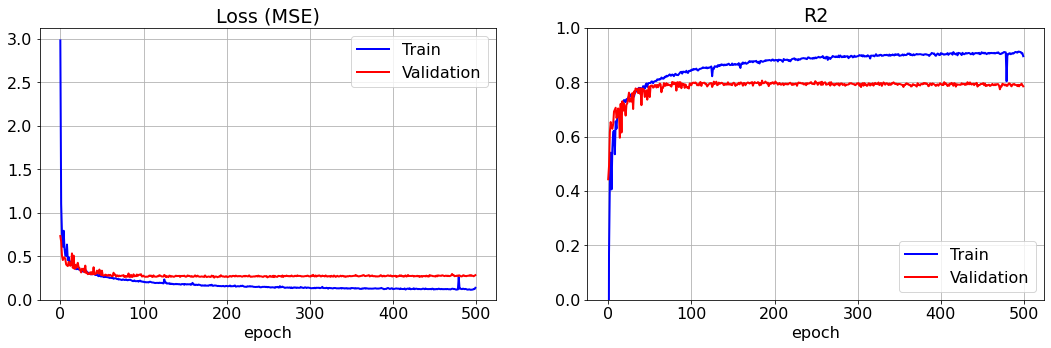

In [10]:
def PlotHistory(lHistory):

    vTrainLoss, vTrainR2, vValLoss, vValR2 = lHistory
    
    plt.figure(figsize=(18, 5))
    
    plt.subplot(1,2,1)
    plt.plot   (vTrainLoss, 'b', lw=2, label='Train'     )
    plt.plot   (vValLoss,   'r', lw=2, label='Validation')
    plt.title  ('Loss (MSE)')
    plt.xlabel ('epoch')
    plt.ylim   (bottom=0)
    plt.legend ()
    plt.grid   ()

    plt.subplot(1,2,2)
    plt.plot   (vTrainR2, 'b', lw=2, label='Train'     )
    plt.plot   (vValR2,   'r', lw=2, label='Validation')
    plt.title  ('R2')
    plt.xlabel ('epoch')
    plt.ylim   (0, 1)
    plt.legend ()
    plt.grid   ()
    
PlotHistory (lHistory)
# plt.suptitle('')
plt.show    ()

#### Model performance:

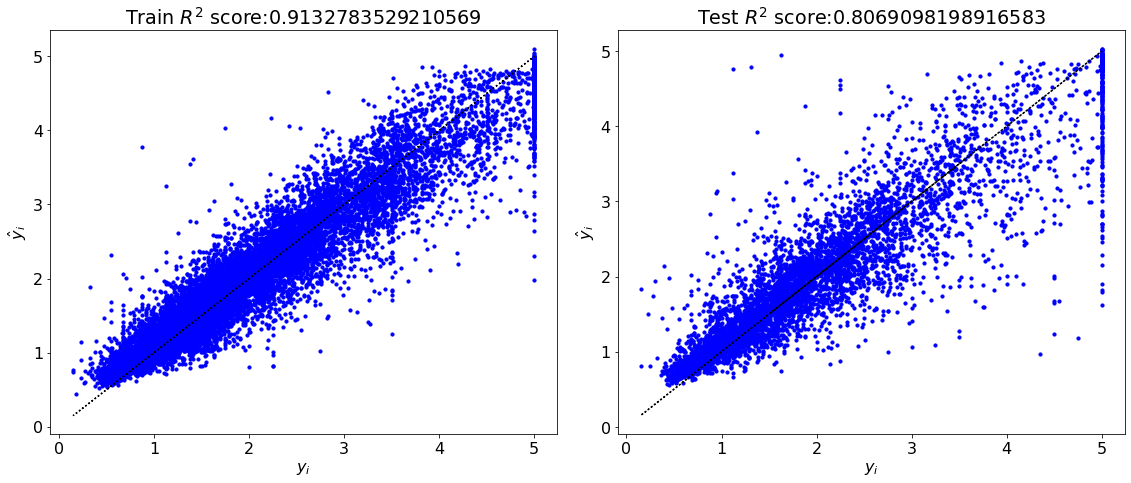

In [11]:
from sklearn.metrics import r2_score

mTestX = mValX
vTestY = vValY

#-- Apply model to data:
vHatTrainY = oModel.Forward(mTrainX.T).squeeze()
vHatTestY  = oModel.Forward(mTestX.T ).squeeze()

_, ax = plt.subplots(1, 2, figsize=(16,7))

ax[0].scatter   (vTrainY, vHatTrainY, s=10, c='b', edgecolor=None)
ax[1].scatter   (vTestY,  vHatTestY,  s=10, c='b', edgecolor=None)
ax[0].plot      (vTrainY, vTrainY, ':k')
ax[1].plot      (vTestY,  vTestY,  ':k')
ax[0].set_title ('Train $R^2$ score:' f'{r2_score(vTrainY, vHatTrainY)}')
ax[1].set_title ('Test $R^2$ score:'  f'{r2_score(vTestY,  vHatTestY) }')
ax[0].set_xlabel('$y_i$')
ax[1].set_xlabel('$y_i$')
ax[0].set_ylabel('$\hat{y}_i$')
ax[1].set_ylabel('$\hat{y}_i$')
plt.tight_layout()
plt.show()